# Question 4.6c for application of quantum mechanics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
from scipy import optimize, interpolate, sparse
import time

%matplotlib inline

In [9]:
Ec = 0.2
Ej = 0.6
Correct_gs = -0.36844154
starting_guess = -10 #way to high, but no worries mi amigos!

N = 100

In $4.6a$ one can see how the $H_{p,q}$ looks like. It will be a matrix with $p^2 E_C$ on the diagonal and $-0.5E_J$ on both diagonals next to the main one.

Observe, how nicely the nondiagonal nonzeros of our Hamiltonian scale. For $N = 0$ we have $0$ elements, $N = 1$ we have $4$, and for $N = 2$ gives us $8$. Thus remembering that it scales maximaly with the square of $N$ observe:
\begin{equation}
y(N) = aN^2 + bN +c \\
y(0) = 0 \rightarrow c = 0 \\
y(1) = 4 \rightarrow a + b = 4 \\
y(2) = 8 \rightarrow 4a + 2b = 8 \\
\rightarrow 2a = 0, b = 4
\end{equation}

Thus number of nonzero elements of H goes with $9N$ and they are all on the main diagonals. Someone said sparse?

In [10]:
def Hamiltonian(N):
    
    main_diag = [Ec * (n+1)**2 for n in range(N)]
    main_diag = np.array(main_diag[::-1]+ [0] +main_diag)
    off_diag = -0.5* Ej* np.ones(len(main_diag)-1)
    Hamiltonian =sparse.diags([off_diag, main_diag, off_diag], [-1, 0, 1])
    
    return Hamiltonian

def Groundstate(N, lowerbound):
    'This function calculates groundstate'
    Ham = Hamiltonian(N)
    if N < 5:
        k = 2*N
    else: 
        k = 10
    eigen_energies, wave_modes = sparse.linalg.eigsh(Ham, k=k, sigma=lowerbound, which='LM')
    
    return min(eigen_energies)

In [11]:
energy_list = []
error_list = []
lowerbound = starting_guess
t = time.time()
for n in range(N-1):
    calculated = Groundstate(n+1, lowerbound)
    energy_list.append(calculated)
    #lowerbound = calculated #If one enables this option, the results will be shit. For some reason scipy doesn't 
    #work well if the initial guess is very close.... 
    error_list.append(np.log(abs(energy_list[-1]-Correct_gs)))
    
t = time.time() - t
print(t)

0.6282374858856201


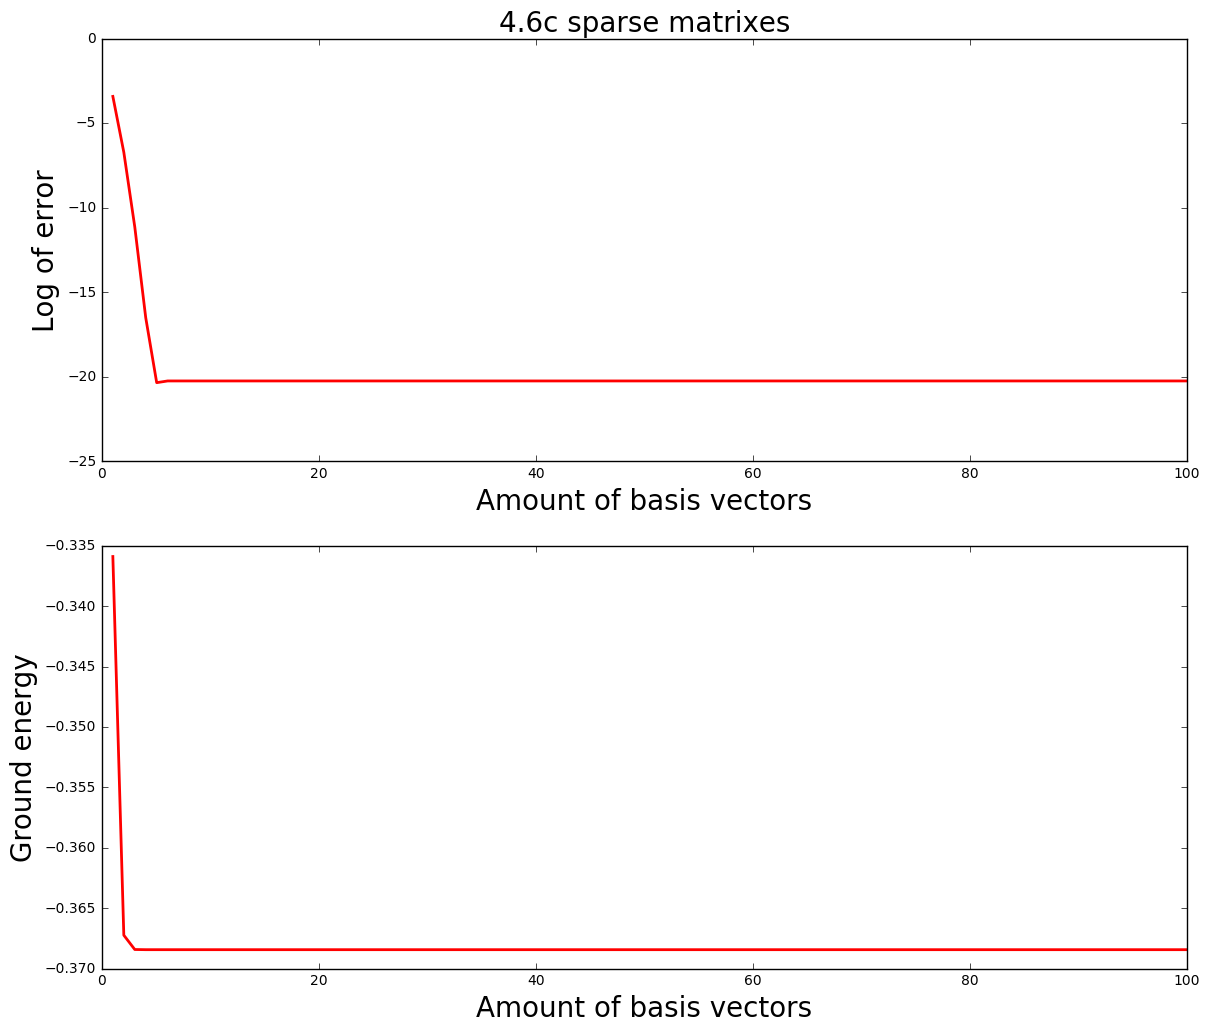

In [21]:
fig = plt.figure(figsize=(14, 12))
ax1 = fig.add_subplot(211)
ax1.plot(np.linspace(1, N, N-1), error_list, 'r', lw = 2)
ax1.set_xlabel('Amount of basis vectors', fontsize = 20)
ax1.set_ylabel('Log of error', fontsize = 20)

ax2 = fig.add_subplot(212)
ax2.plot(np.linspace(1, N, N-1), energy_list, 'r' , lw =2)
ax2.set_xlabel('Amount of basis vectors', fontsize = 20)
ax2.set_ylabel('Ground energy', fontsize = 20)
ax1.set_title('4.6c sparse matrixes', fontsize = 20)

I was getting some weird results from sparse matrixes based algorithms. After all 100x100 is still a small matrix, in case of $N<10$ it's hardly really sparse. Lets try doing it non sparse.

In [13]:
def HamiltonianNS(N):
    
    main_diag = [Ec * (n+1)**2 for n in range(N)]
    main_diag = np.array(main_diag[::-1]+ [0] +main_diag)
    off_diag = -0.5* Ej* np.ones(len(main_diag)-1)
    Hamiltonian =np.diag(off_diag, -1) + np.diag(off_diag, 1) + np.diag(main_diag)
    
    return Hamiltonian

def GroundstateNS(N, lowerbound):
    'This function calculates groundstate'
    Ham = HamiltonianNS(N)
    if N < 5:
        k = 2*N
    else: 
        k = 10
    eigen_energies = np.linalg.eigvalsh(Ham)
    
    return min(eigen_energies)

In [19]:
energy_listNS = []
error_listNS = []
lowerbound = starting_guess
t = time.time()
for n in range(N-1):
    energy_listNS.append(GroundstateNS(n+1, lowerbound))
    #lowerbound = energy_listNS[-1]
    error_listNS.append(np.log(abs(energy_listNS[-1]-Correct_gs)))
    
t = time.time() - t
print(t)

0.05290675163269043


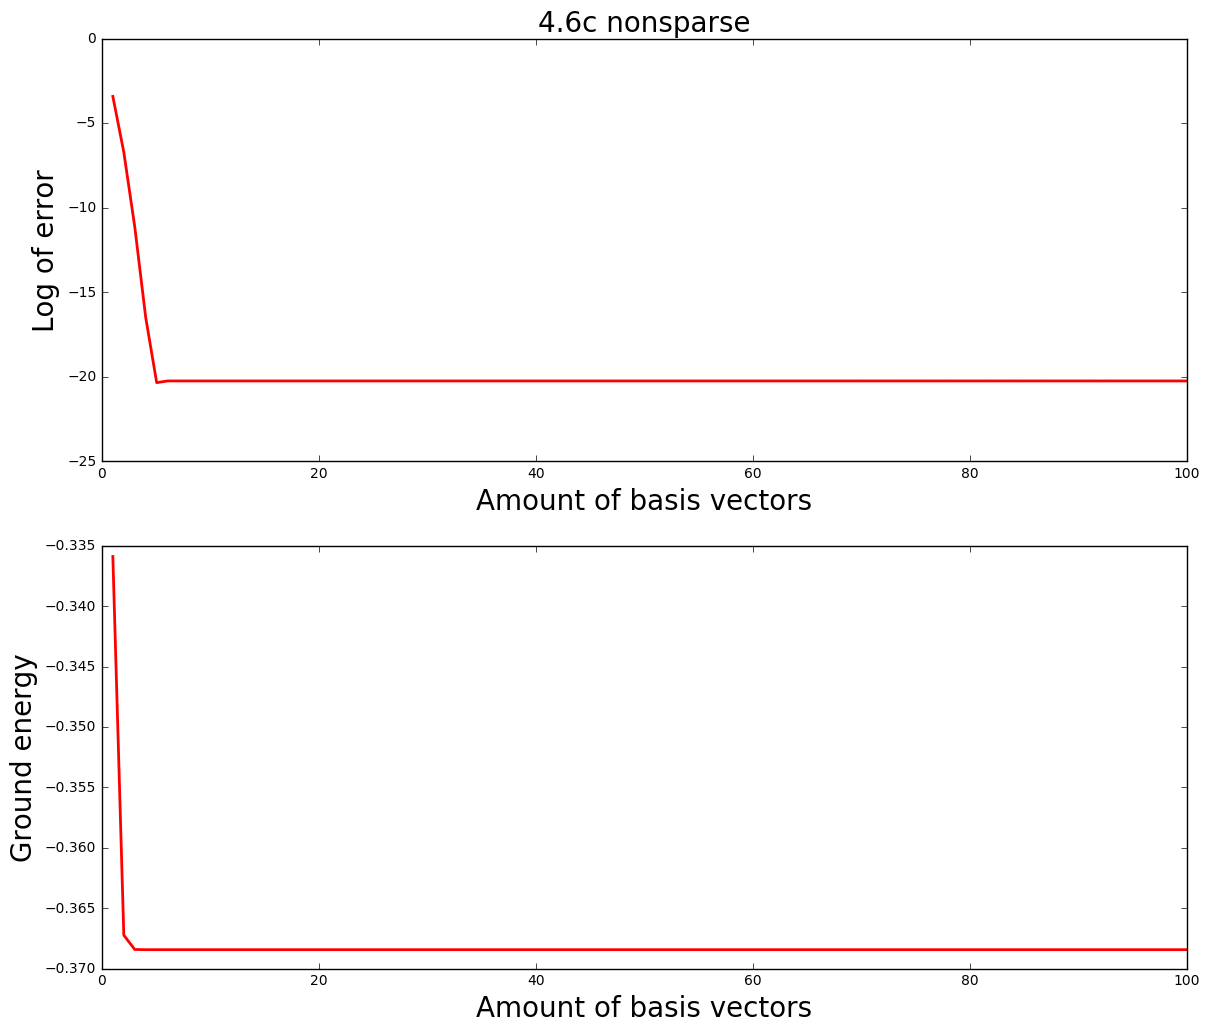

In [22]:
fig = plt.figure(figsize=(14, 12))
ax1 = fig.add_subplot(211)
ax1.plot(np.linspace(1, N, N-1), error_listNS, 'r', lw = 2)
ax1.set_xlabel('Amount of basis vectors', fontsize = 20)
ax1.set_ylabel('Log of error', fontsize = 20)

ax2 = fig.add_subplot(212)
ax2.plot(np.linspace(1, N, N-1), energy_listNS, 'r' , lw =2)
ax2.set_xlabel('Amount of basis vectors', fontsize = 20)
ax2.set_ylabel('Ground energy', fontsize = 20)
ax1.set_title('4.6c nonsparse', fontsize = 20)

# Check of the Groundstate found in b

In [24]:
Groundstate(1, lowerbound)

-0.33588989435406802